In [572]:
import pandas as pd
df = pd.read_csv('../z20_data/chipotle.tsv',sep='\t')
df['choice_description'].fillna('',inplace=True)
df.head()

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_2732\2010380480.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['choice_description'].fillna('',inplace=True)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [573]:
# 기초 데이터 탐색
df.info()
df.shape
df.columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  4622 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  4622 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [575]:
# df['order_id'] = df['order_id'].astype(str)

In [576]:
# 주문 당 평균 계산 금액
df['item_price'] = df['item_price'].str.replace('$','').astype(float)
df.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [577]:
# 한 주문에 10달러 이상 사용한 주문 번호 출력
filt = df.groupby('order_id').sum()
filt[filt['item_price']>=10].sort_values('item_price',ascending=False).head()['item_price']

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
Name: item_price, dtype: float64

In [578]:
# item당 주문 갯수 출력
df.groupby('item_name')['quantity'].value_counts()['Chicken Bowl'].sum()
df.groupby('item_name')['quantity'].sum().head()

df[df['item_name'] == '6 Pack Soft Drink']['quantity'].sort_values(ascending=False).sum()

55

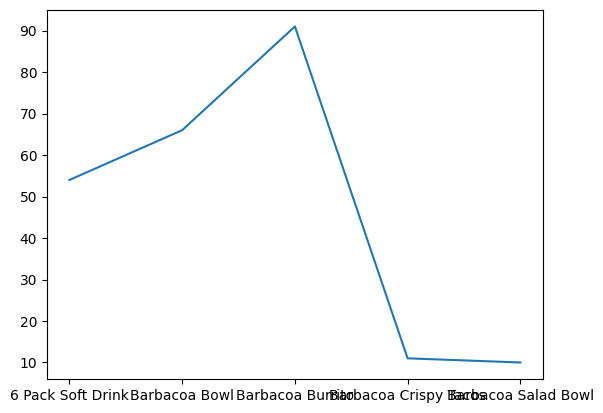

In [579]:
df.groupby('item_name')['order_id'].count().head()
df.groupby('item_name')['order_id'].count().head()

#막대 그래프
import matplotlib.pyplot as plt
x = df.groupby('item_name')['order_id'].count().head().index
y = df.groupby('item_name')['order_id'].count().head().values
plt.plot(x,y)

In [580]:
# 각 아이템의 가격 구하시오.: 주문 1개, item_name이 최저 가격
qu_df = df[df['quantity']==1]
group_df = qu_df.groupby('item_name').min()
group_df.sort_values('item_price',ascending=False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [587]:
# 가장 비싼 주문에서 item이 총 몇 개 주문되었는지 출력
# 가장 높은 금액으로 주문한 주문번호, 수량, 금액 출력
df.groupby('order_id')[['order_id','quantity','item_price']].sum().sort_values('item_price',ascending=False)

,order_id,quantity,item_price
order_id,,,
926,21298,23,205.25
1443,10101,35,160.74
1483,20762,14,139.00
691,7601,11,118.25
1786,19646,20,114.30
...,...,...,...
17,34,2,10.08
889,1778,2,10.08
1014,2028,2,10.08


In [616]:
# Chicken Bowl을 한 주문에 2개 이상 주문한 횟수가 몇 번인지 출력하시오.
name = df[df['item_name'] == 'Chicken Bowl']
len(name[name['quantity']>=2])

# 치킨 볼의 총 매출액
C_sum = name['item_price'].sum()
A_sum = df['item_price'].sum()

# 총 매출액에서 비율
C_sum/A_sum*100

21.283176657731442